### Import Packages

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

### Data Collection and Processing


In [139]:
df = pd.read_csv('loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [140]:
#Size of Data
df.shape   

(614, 13)

In [141]:
# Describe the numerical data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [142]:
df.groupby(["Credit_History"])["Loan_ID"].count() 

Credit_History
0.0     89
1.0    475
Name: Loan_ID, dtype: int64

In [143]:
#Drop unnecessary column which is Loan_ID
df = df.drop(columns = ("Loan_ID") )
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [144]:
#Number of missing values in each column
df.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [145]:
#Drop missing values
df = df.dropna()
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Visualization

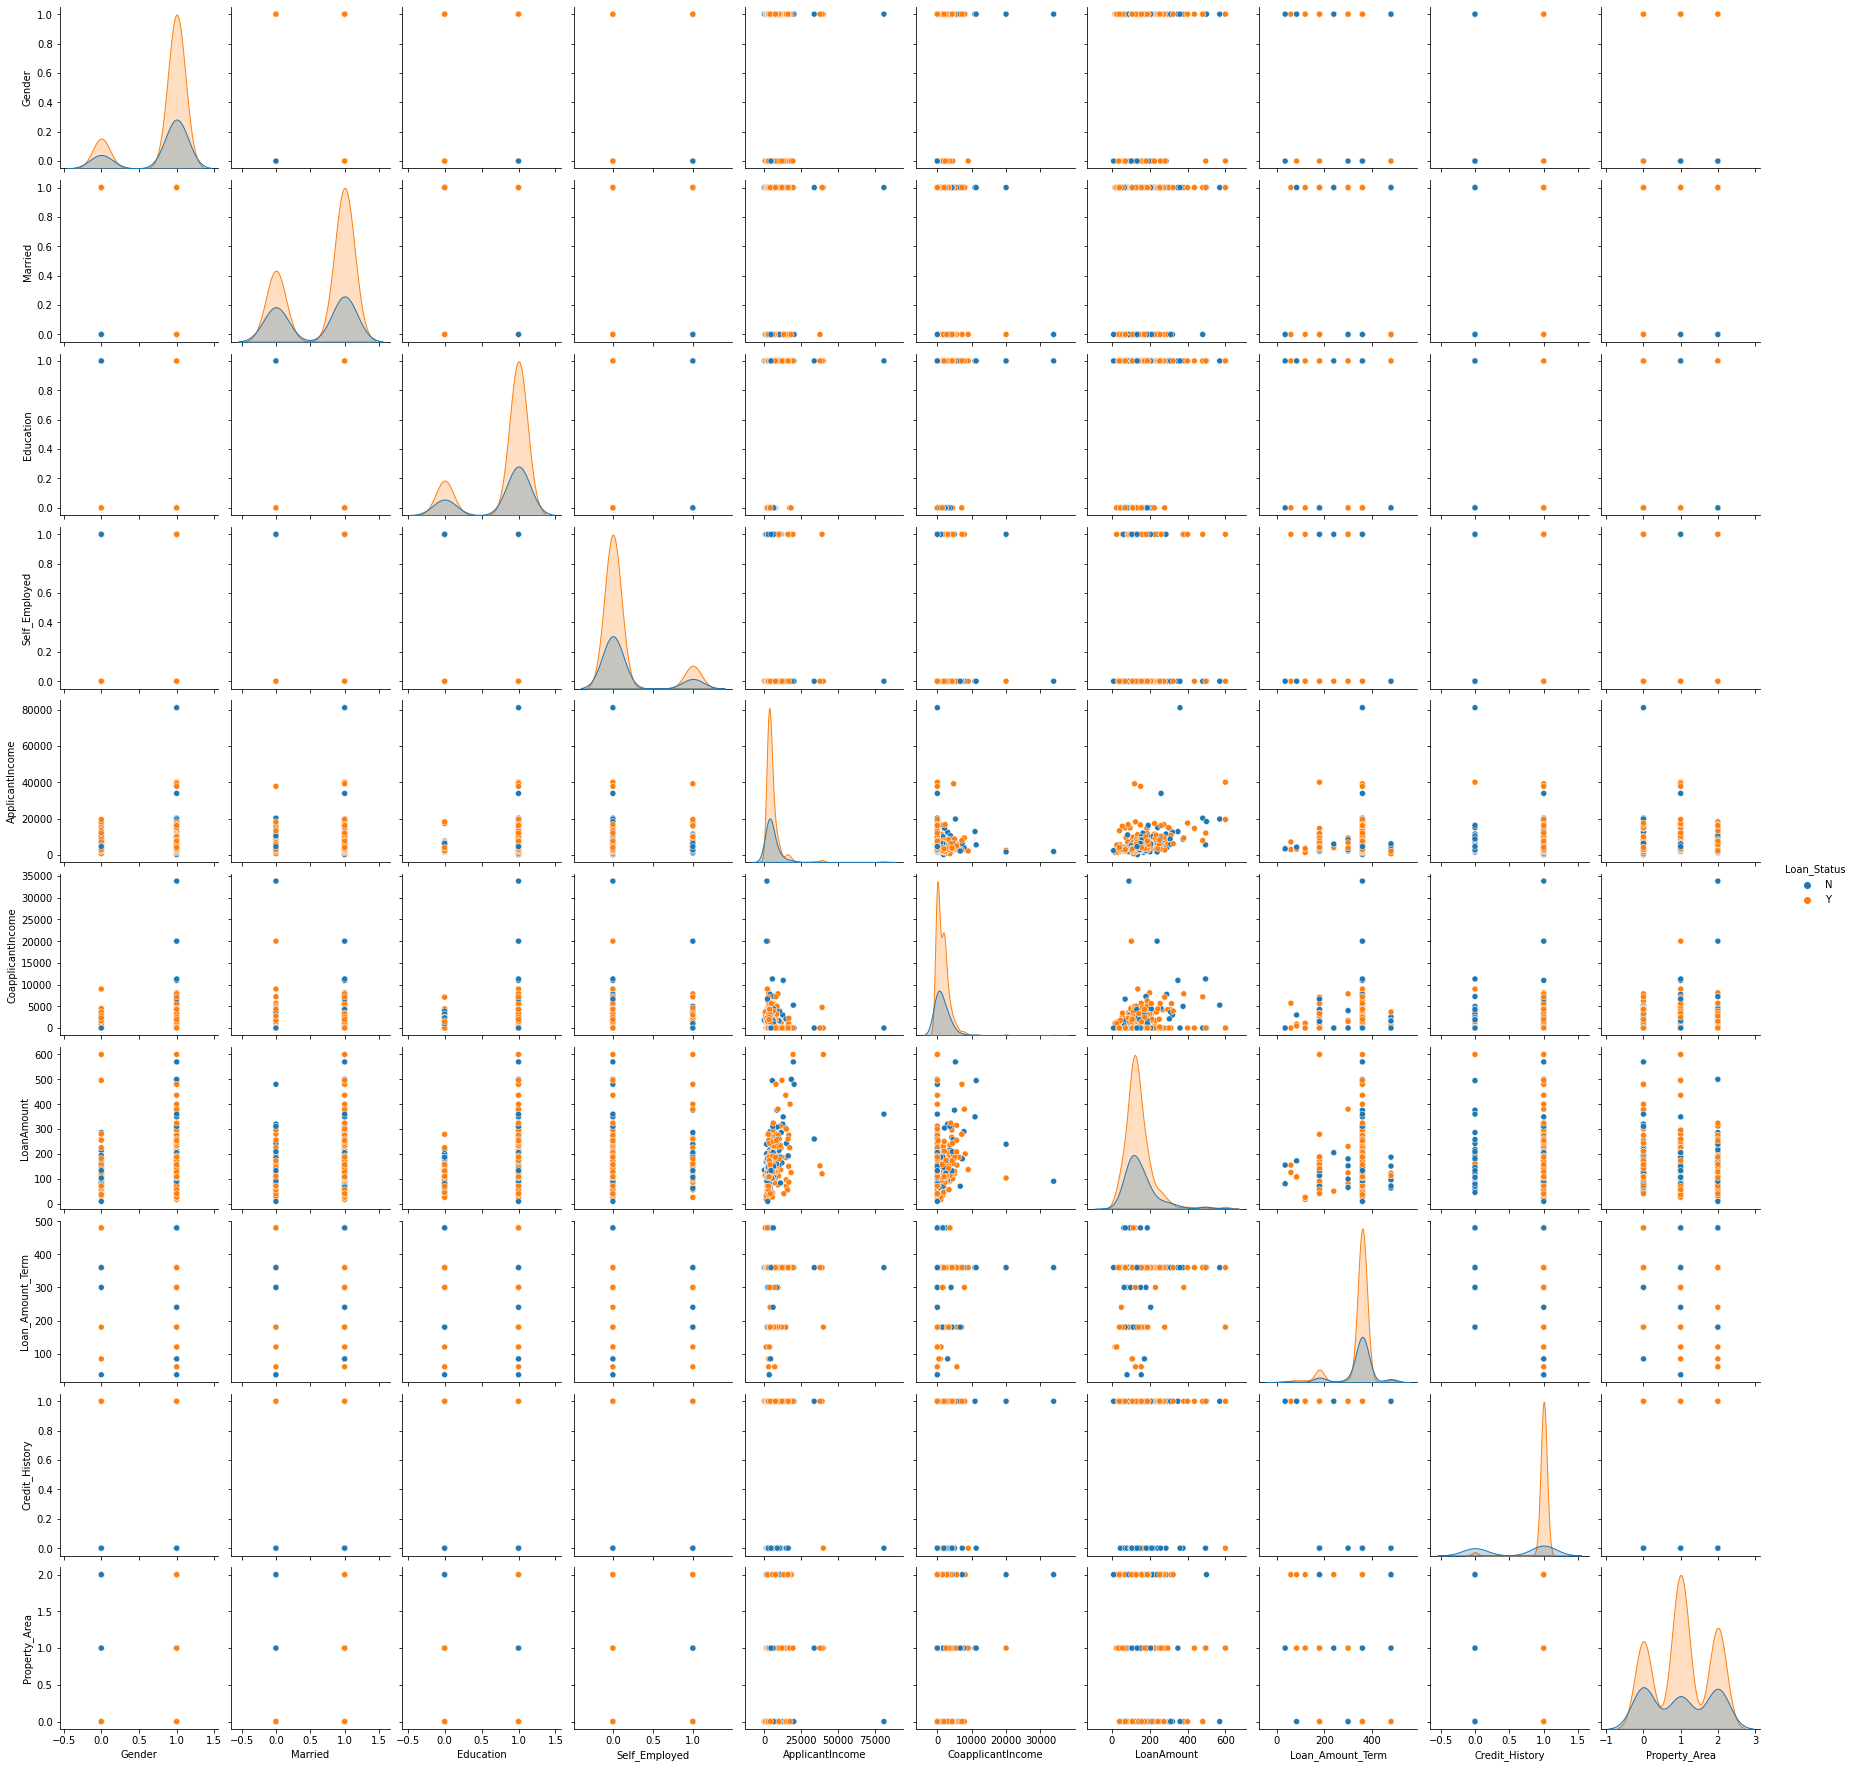

In [169]:
#Visualize data with pairplot
sns.pairplot(df,hue='Loan_Status')
plt.show()

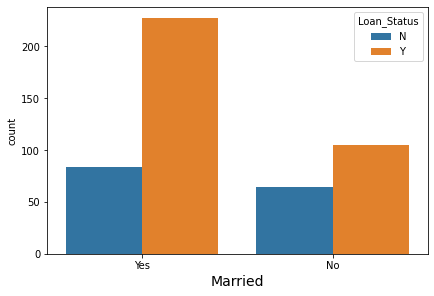

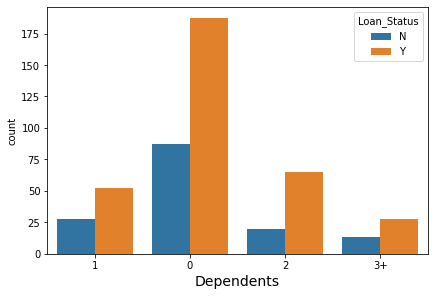

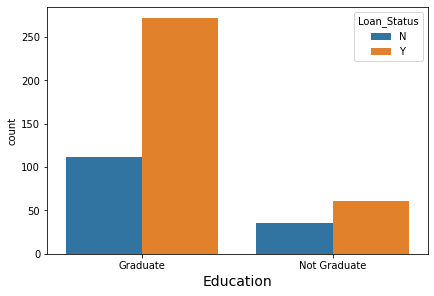

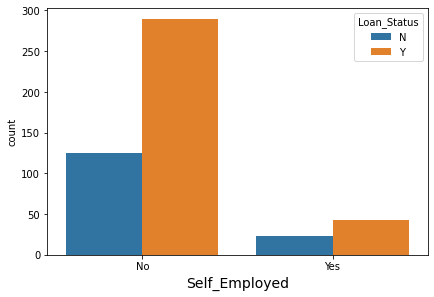

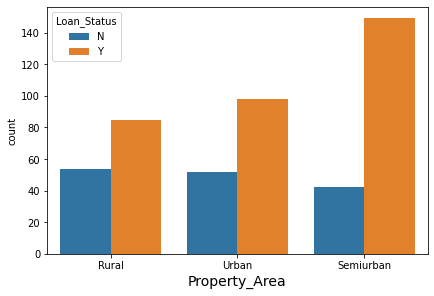

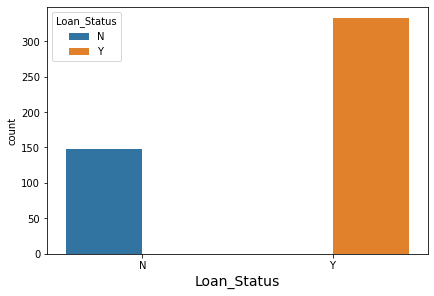

In [146]:
#Countplots to visualize Married, Dependents, Education, Self Employed, Property Area and Loan Status
categorical_columns = df.select_dtypes('object').columns.to_list()

for i in categorical_columns[1:]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.countplot(x=i ,hue='Loan_Status', data= df)
    plt.xlabel(i, fontsize=14)

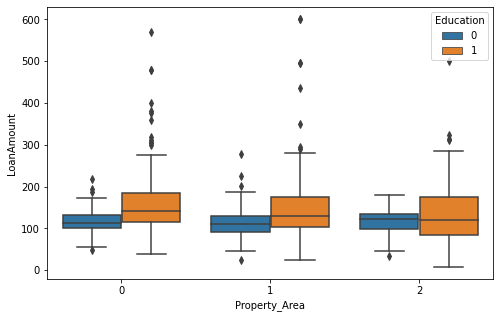

In [208]:
#Boxplot to further visualize and view outliers
plt.figure(figsize=(8,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=df)
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

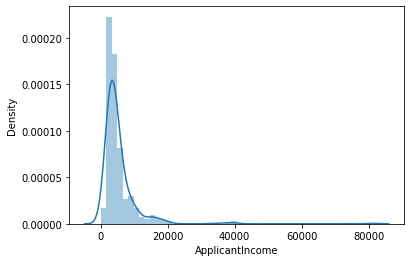

In [233]:
#Distribution plots for numerical data
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

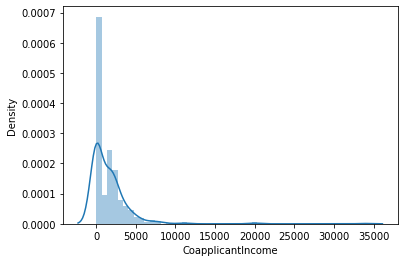

In [239]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

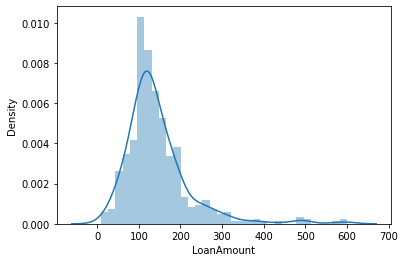

In [240]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

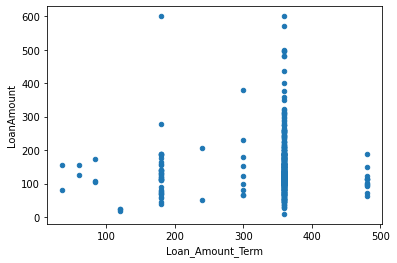

In [242]:
#Scatterplot to visualize Loan Amount Term
df.plot.scatter("Loan_Amount_Term", "LoanAmount")


### Visualising Correlation

In [163]:
df.corr

<bound method DataFrame.corr of      Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmo

Text(0.5, 1.0, 'Correlation Matrix')

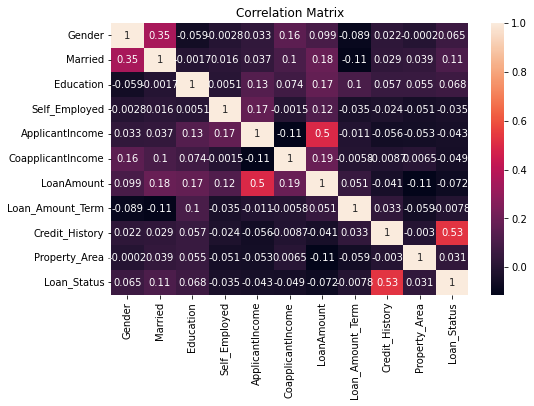

In [262]:
#Check for correlation between all numeric columns 
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

### Encode and Transform Data

In [220]:
#Encode labels
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

In [221]:
#Convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [222]:
df.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [223]:
#Replace the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

### Modeling

In [224]:
#Split into x and y from data
warnings.filterwarnings("ignore")
x = df.drop('Loan_Status', axis='columns')
y = df['Loan_Status']

In [225]:
#Train, Test, Split
x_train , x_test , y_train ,  y_test = train_test_split(x, y,
                                                 test_size = 0.20, 
                                                 random_state = 33)

#### Decision Tree Classifier

In [243]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

dtree_pred = dtree.predict(x_test)
accuracy_score(y_test,dtree_pred)

0.6979166666666666

#### Random Forest Classifier 

In [244]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)
accuracy_score(y_test, rfc_pred)

0.7604166666666666

In [168]:
print(confusion_matrix(y_test, rfc_pred))


[[15 17]
 [ 5 59]]


#### Logistic Regression

In [128]:
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
classifier.score(x_train,y_train)

0.8151041666666666

#### SVC

In [88]:
svc = SVC()
svc.fit(x_train, y_train)

svm_pred = svc.predict(x_test)
accuracy_score(y_test,svm_pred)

0.6666666666666666

#### Naive Bayes

In [159]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

gb_pred = gaussian.predict(x_test)
accuracy_score(y_test,gb_pred)

0.7604166666666666

### Conclusion

Decision Tree        -         69.79

Random Forest Classifier    -  76.04

Logistic Regression     -      81.51

SVC                   -        66.66

Gaussian Naivey Bayes    -     76.04




Random Forest and Logistic Regression are the best models to predict loan approval prediction, and with these models we are able to predict whether a customer is eligible for a loan or not based on their information such as Gender, Marital Status, Education, Credit History, etc. Using Data Preprocessing, Data Visualization and Machine Learning Models, we are able to make educated conclusions.